## Compare Train/Test split with LOOCV using FF with 2 Hidden Layers

Como o dataset possui poucas linhas de dados, foi comparado a tecnica da separação por train/test com a Leave-one-out Cross Validation (LOOCV)

In [1]:
import tcc_utils
import tratamento_dados_empresa
from keras.initializers import glorot_normal as gl_normal, glorot_uniform as gl_uni, RandomUniform as rnd_uni

x_csv_path = '../data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = '../data/grendene-cotacao-raw.csv'

X = tratamento_dados_empresa.treat_economatica_indicadores_financeiros(x_csv_path)

# Spliting test / train and Feature Scaling
x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa. \
    get_scaled_splits_and_scaler(x_csv_path, y_csv_path, 0.2, 0)

number_hidden_layer = round(x_train.shape[1]*1.5)

Using TensorFlow backend.


### 1) Train / test split

80% train / 20% test / 0% validation split


**Feed forward with 2 hidden layers**

**kernel_initializer:** glorot_normal

**layers:** input(X columns), (X columns * 1.5), (X columns * 1.5), output(1)

**activations:** input(none), 'relu', 'relu', output(none)

**optimizer:** adam

**loss:** MSE

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 84)                4788      
_________________________________________________________________
dense_2 (Dense)              (None, 84)                7140      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

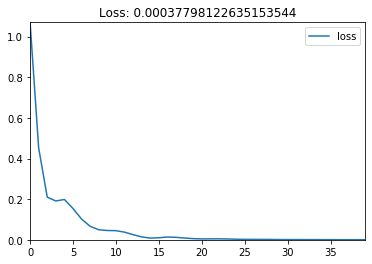

MSE of training: 0.00036180159903861664
MSE of testing: 0.12480196356773376
    Prediction      Real     % error
8     7.343605  8.491036   13.513444
0     6.848918  8.075241   15.186203
7     5.479575  5.156991    6.255286
9     4.153992  4.785659   13.199157
2     5.199570  4.616062   12.640816
1     3.007050  3.669486   18.052565
6     3.822954  3.491649    9.488511
3     2.832765  3.003443    5.682739
10    1.202778  1.377930   12.711290
5     2.416966  0.900556  168.385848
4    -0.731029  0.667981  209.438578


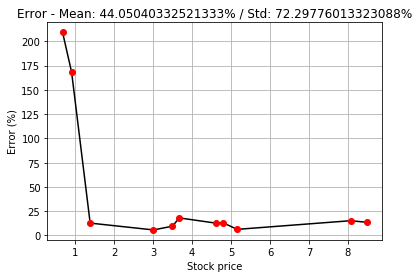

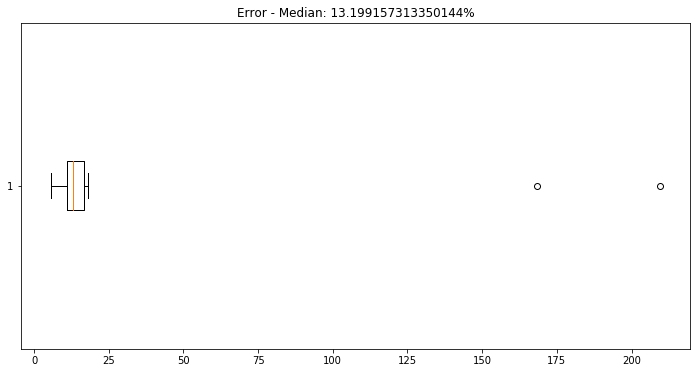

count     11.000000
mean      44.050403
std       72.297760
min        5.682739
25%       11.064663
50%       13.199157
75%       16.619384
max      209.438578
Name: % error, dtype: float64


In [2]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler)

### LOOCV implementation

### 2) K-Fold Cross Validation where test set = 1 row (LOOCV)

Training and gathering results for 55 iterations

**Feed forward with 2 hidden layers**

**kernel_initializer:** glorot_normal

**layers:** input(X columns), (X columns * 1.5), (X columns * 1.5), output(1)

**activations:** input(none), 'relu', 'relu', output(none)

**optimizer:** adam

**loss:** MSE

Training K-Fold: 1/55
Training K-Fold: 2/55
Training K-Fold: 3/55
Training K-Fold: 4/55
Training K-Fold: 5/55
Training K-Fold: 6/55
Training K-Fold: 7/55
Training K-Fold: 8/55
Training K-Fold: 9/55
Training K-Fold: 10/55
Training K-Fold: 11/55
Training K-Fold: 12/55
Training K-Fold: 13/55
Training K-Fold: 14/55
Training K-Fold: 15/55
Training K-Fold: 16/55
Training K-Fold: 17/55
Training K-Fold: 18/55
Training K-Fold: 19/55
Training K-Fold: 20/55
Training K-Fold: 21/55
Training K-Fold: 22/55
Training K-Fold: 23/55
Training K-Fold: 24/55
Training K-Fold: 25/55
Training K-Fold: 26/55
Training K-Fold: 27/55
Training K-Fold: 28/55
Training K-Fold: 29/55
Training K-Fold: 30/55
Training K-Fold: 31/55
Training K-Fold: 32/55
Training K-Fold: 33/55
Training K-Fold: 34/55
Training K-Fold: 35/55
Training K-Fold: 36/55
Training K-Fold: 37/55
Training K-Fold: 38/55
Training K-Fold: 39/55
Training K-Fold: 40/55
Training K-Fold: 41/55
Training K-Fold: 42/55
Training K-Fold: 43/55
Training K-Fold: 44/

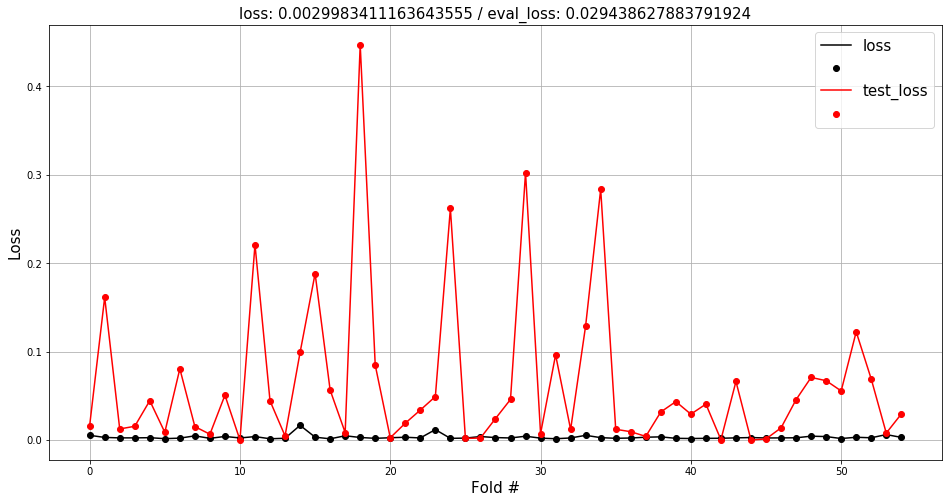

    Prediction      Real     % error
7     8.061859  8.770985    8.084903
25    7.212406  8.491036   15.058590
44    7.791867  8.434865    7.623104
11    8.119327  8.106093    0.163261
16    6.991092  8.075241   13.425596
39    7.484794  7.930000    5.614203
36    7.968497  7.693247    3.577816
17    8.259768  7.666291    7.741385
4     7.395877  7.084401    4.396644
28    7.306685  6.917610    5.624416
19    7.598870  5.928323   28.179084
20    4.554537  5.281612   13.766155
54    5.378378  5.156991    4.292955
34    4.001410  4.900166   18.341331
55    4.365882  4.794493    8.939652
1     4.465784  4.785659    6.684027
8     4.455804  4.764059    6.470426
37    4.507420  4.749780    5.102569
15    5.402327  4.616062   17.033226
6     4.805612  4.571799    5.114240
35    5.895191  4.564561   29.151321
5     5.032740  4.505757   11.695752
32    5.267568  4.492191   17.260544
12    3.153669  4.328178   27.136328
26    4.404553  4.297708    2.486087
29    3.134149  3.669486   14.588878
2

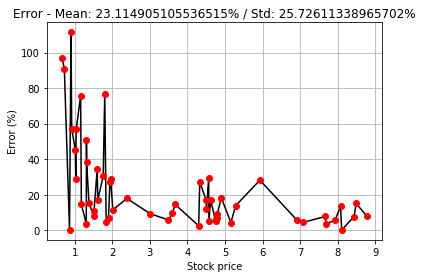

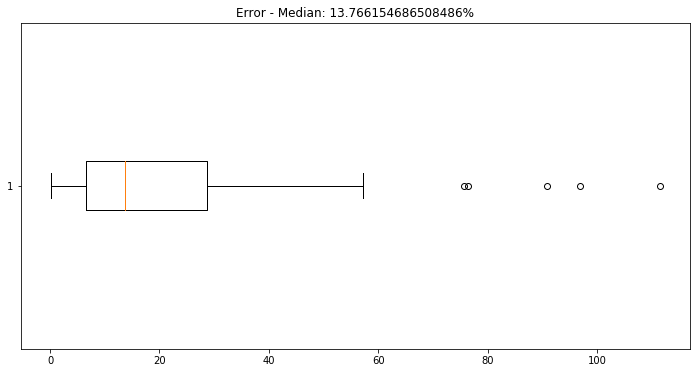

count     55.000000
mean      23.114905
std       25.726113
min        0.163261
25%        6.577226
50%       13.766155
75%       28.664701
max      111.468845
Name: % error, dtype: float64


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Get X and Y datasets
x, y = tratamento_dados_empresa.get_x_y(x_csv_path, y_csv_path)

# Feature Scaling X
x_scaler = StandardScaler()
x = x_scaler.fit_transform(x)
# Feature Scaling y
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y)

# LOOCV: k-fold cross validation (folds=x.shape[0], shuffle=True, seed=1)
kfold = KFold(x.shape[0], True, 1)

# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']

# Run LOOCV and get results
results_loss, results_evaluate, prediction_results = tcc_utils.loocv(x, y, kfold, gl_normal, 
                                                                     layers, activations, y_scaler)

# Evaluate results
tcc_utils.plot_loss_eval(results_loss, results_evaluate)
tcc_utils.show_results(prediction_results)

In [13]:
# Evaluation Loss Mean
results_evaluate.mean()

0.06806086230095719

In [14]:
# Evaluation Loss Std
results_evaluate.std()

0.08395523141563345